# Re-execution rate per subject

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

In [2]:
total = pd.read_csv("data/total.csv", index_col=0)

In [3]:
total['subject'] = total.subject.str.replace(';Social Sciences', '')
total.groupby(['subject']).size().nlargest(10)

subject
Social Sciences                                                                              2943
Earth and Environmental Sciences                                                               63
Medicine; Health and Life Sciences                                                             63
Business and Management                                                                        59
Law                                                                                            52
Earth and Environmental Sciences;Mathematical Sciences;Medicine; Health and Life Sciences      44
Arts and Humanities                                                                            36
Computer and Information Science                                                               30
Other                                                                                          28
Agricultural Sciences                                                                          19
dtype: int64

In [4]:
total.subject = total.subject.apply(lambda x: 'Physics' if 'Physics' in x else x)
total.subject = total.subject.apply(lambda x: 'Health and\nLife Sciences' if 'Health and Life Sciences' in x else x)
total.subject = total.subject.apply(lambda x: 'Earth and\nEnvironmental Sciences' if 'Earth and Environmental Sciences' in x else x)
total.subject = total.subject.apply(lambda x: 'Law' if 'Law' in x else x)
total.subject = total.subject.apply(lambda x: 'Computer and\nInformation Science' if 'Computer and Information Science' in x else x)
total.subject = total.subject.apply(lambda x: 'Agricultural Sciences' if 'Agricultural Sciences' in x else x)
total.subject = total.subject.apply(lambda x: 'Business and\nManagement' if 'Business and Management' in x else x)

In [5]:
total.groupby(['subject']).size()

subject
Agricultural Sciences                  21
Arts and Humanities                    36
Business and\nManagement               60
Computer and\nInformation Science      45
Earth and\nEnvironmental Sciences      77
Health and\nLife Sciences             133
Law                                    65
Mathematical Sciences                  14
Other                                  28
Physics                                19
Social Sciences                      2943
dtype: int64

In [6]:
temp = total.groupby(
    ['success', 'subject']).size().reset_index().pivot(columns='success', index='subject', values=0)
temp

success,0,1
subject,,
Agricultural Sciences,18,3
Arts and Humanities,31,5
Business and\nManagement,35,25
Computer and\nInformation Science,25,20
Earth and\nEnvironmental Sciences,48,29
Health and\nLife Sciences,54,79
Law,31,34
Mathematical Sciences,10,4
Other,13,15


In [7]:
#temp.fillna(0.0, inplace=True)
temp['total'] = [i+j for i,j in zip(temp[1],temp[0])]
#temp['total'] = [i+j for i,j in zip(temp[2],temp['total'])]

temp['s'] = [(i*1./j) * 100 for i,j in zip(temp[1], temp['total'])]
temp['f'] = [(i*1./j) * 100 for i,j in zip(temp[0], temp['total'])]

#temp['sortby'] = [i+j for i,j in zip(temp['s'], temp['t'])]

temp = temp.sort_values(by=['s'], ascending=False).head(11)
temp

success,0,1,total,s,f
subject,,,,,
Health and\nLife Sciences,54,79,133,59.398496,40.601504
Other,13,15,28,53.571429,46.428571
Law,31,34,65,52.307692,47.692308
Computer and\nInformation Science,25,20,45,44.444444,55.555556
Business and\nManagement,35,25,60,41.666667,58.333333
Social Sciences,1759,1184,2943,40.231057,59.768943
Earth and\nEnvironmental Sciences,48,29,77,37.662338,62.337662
Mathematical Sciences,10,4,14,28.571429,71.428571
Agricultural Sciences,18,3,21,14.285714,85.714286


In [8]:
names = list(temp.index)
r= np.arange(len(temp['s']))

In [9]:
from helpers import autolabel, autolabel_count

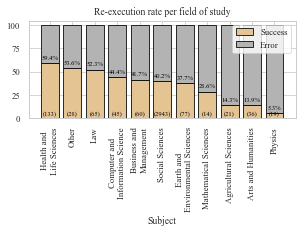

In [10]:
plt.figure(figsize=(4.78,1.8))
sns.set_context("paper", font_scale=1)
barWidth=0.8

temp.s = temp.s.round(1)
temp.total = temp.total.astype(int)

lrects = plt.bar(
    r, 
    temp['s'], 
    color=sns.color_palette("Set2")[6], 
    edgecolor='black', 
    width=barWidth, 
    label="Success")
hrects = plt.bar(
    r, 
    100-temp['s'], 
    bottom=temp['s'], 
    color=sns.color_palette("Set2")[7], 
    edgecolor='black', 
    width=barWidth, 
    label="Error")

plt.xticks(r, names, rotation=90) #, fontsize=15)
plt.xlabel("Subject") #, size=15)

plt.legend(loc='best', ncol=1) #,prop={'size': 15})

temp['year'] = temp.index
temp = temp.reset_index(drop=True)

plt.title("Re-execution rate per field of study") #, size=20)

autolabel(lrects, plt)
autolabel_count(hrects, plt, temp)

#plt.savefig("subject_new2.pdf", bbox_inches = "tight", dpi=100)
plt.show()